https://kr.mathworks.com/help/signal/ref/dct.html#bvk_sqb


 1.0000  0.5403 -0.4161 -0.9900 -0.6536  0.2837  0.9602  0.7539
 0.5403 -0.4161 -0.9900 -0.6536  0.2837  0.9602  0.7539 -0.1455
-0.4161 -0.9900 -0.6536  0.2837  0.9602  0.7539 -0.1455 -0.9111
-0.9900 -0.6536  0.2837  0.9602  0.7539 -0.1455 -0.9111 -0.8391
-0.6536  0.2837  0.9602  0.7539 -0.1455 -0.9111 -0.8391  0.0044
 0.2837  0.9602  0.7539 -0.1455 -0.9111 -0.8391  0.0044  0.8439
 0.9602  0.7539 -0.1455 -0.9111 -0.8391  0.0044  0.8439  0.9074
 0.7539 -0.1455 -0.9111 -0.8391  0.0044  0.8439  0.9074  0.1367
[torch.FloatTensor of size 8x8]


-0.1211 -0.4355  0.1358  0.5077 -0.0095  0.1554  0.0302  0.0755
-0.4355 -1.4255 -0.2975  1.5743 -0.0505  0.4579  0.0666  0.2068
 0.1358 -0.2975  4.2498  0.8363  0.1012  0.3906  0.2016  0.2781
 0.5077  1.5743  0.8363 -1.6788  0.0689 -0.4710 -0.0514 -0.2007
-0.0095 -0.0505  0.1012  0.0689  0.0011  0.0239  0.0072  0.0134
 0.1554  0.4579  0.3906 -0.4710  0.0239 -0.1269 -0.0085 -0.0504
 0.0302  0.0666  0.2016 -0.0514  0.0072 -0.0085  0.0051  0.0006
 0.07

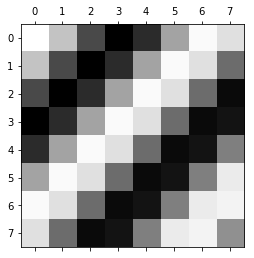

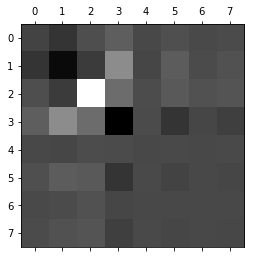

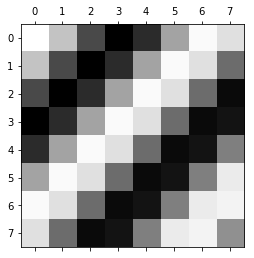

In [127]:
import math

import torch
import matplotlib.pyplot as plt


def dct_matrix(n):
    ret = torch.Tensor(n, n)
    
    for k in range(n):
        for i in range(n):
            ret[k, i] = math.pi / n * (i + .5) * k
            
    ret = torch.cos(ret)  
    ret[0] /= math.sqrt(2) # X_0 /= sqrt(2)
    return ret * math.sqrt(2 / n)


def idct_matrix(n):
    ret = torch.Tensor(n, n)
    
    for k in range(n):
        for i in range(n):
            ret[k, i] = math.pi / n * i * (k + .5)
            
    ret = torch.cos(ret)
    ret[:, 0] /= math.sqrt(2) # x_0 /= sqrt(2)
    return ret * math.sqrt(2 / n)
    
N = 8

dct_mat = dct_matrix(N)
idct_mat = idct_matrix(N)

t = torch.cos(torch.arange(N) + torch.arange(N).unsqueeze(0).t())
print(t)
plt.matshow(t.numpy(), cmap='gray')

s = torch.matmul(torch.matmul(t.t(), dct_mat).t(), dct_mat)
print(s)
plt.matshow(s.numpy(), cmap='gray')

t = torch.matmul(torch.matmul(s.t(), idct_mat).t(), idct_mat)  # (... + x_0 / sqrt(2)) * scale_factor
print(t)
plt.matshow(t.numpy(), cmap='gray')

plt.show()
